# Topic 0: Introduction to Python (Part 3)

This is the third part of the Introduction to Python for Natural Language Engineering course.

These notebooks are designed to give you the working knowledge of Python necessary to complete the lab sessions for Natural Language Engineering. 

From the first 2 notebooks you should be familiar with a range of data types including strings, lists, sets, tuples and dictionaries.  You should also be familiar with defining your own functions as well as a number of built-in functions including print(), type(), range() and zip().  This notebook will introduce a number of more complex features including list comprehensions, map(), lazy generators and running python programs in other environments.  It will also introduce two Python libraries - Collections and Pandas.

As in the last session:-

- Run all of the code cells as you work through the notebook. 
- Try to understand what is happening in each code cell and predict the output before running it.
- Complete all of the exercises.
- Solutions to all exercises are provided, but please avoid loading the solution until you have had a go at solving it yourself.


Run the following cell twice, first to load some set up code, then again to run the code.

In [1]:
# %load ../setup
import sys
#sys.path.append(r'T:\Departments\Informatics\LanguageEngineering') 
sys.path.append(r'/Users/davidw/Documents/teach/NLE/resources')
#sys.path.append(r'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources)
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from collections import defaultdict,Counter
from itertools import zip_longest
from IPython.display import display
from random import seed
get_ipython().magic('matplotlib inline')
import random
import math
import matplotlib.pylab as pylab
%matplotlib inline
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
from pylab import rcParams
from operator import itemgetter, attrgetter, methodcaller
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import csv



## Classes

Anyone who has previously programmed in Java will be familiar with the concept of objects.  A Python class  is a complex type whichallows the encapsulation of attributes and methods.  You have already been using a number of Python classes (e.g., strings, lists, dictionaries).  However, sometimes it is useful to be able to define new classes.

In [2]:
class Student:
    passmark=50  #this is a class variable which will be shared by all instances of Student
    
    def __init__(self,name,mark):  
        """
        initialisation method run when a new instance is created
        in general it can take any number of arguments (in addition to self)
        :param self: this instance, name: name of Student, mark: mark of Student
        """
        self.name=name  #store the name in an instance variable called name
        self.mark=mark  #store the mark in an instance variable called mark
        
    def passes(self):
        """
        has this student passed the course?
        check whether the mark associated with this instance is greater than the class variable Passmark
        :param self: this instance
        :returns boolean
        """
        return self.mark > Student.passmark

In [5]:
Student

__main__.Student

In [6]:
type(Student)

type

Creating an instance of a class (remember every class defines a type).

In [7]:
student1 = Student("Jack",40)

In [8]:
student1

In [10]:
type(student1)

__main__.Student

In [11]:
student1.passes()

False

## Default Dictionaries

If we import the collections library, we can make dictionaries that have a default value when none is specified.  This avoids having to use .get() every time we perform a dictionary lookup of a key which may not be present.

In [2]:
# To do this, we need to use a class that is not built-in, so we import it
import collections
word_counts = collections.defaultdict(int)
# the "int" parameter will create entries with a default value of 0
word_counts

defaultdict(int, {})

In [3]:
type(word_counts)

collections.defaultdict

In [4]:
len(word_counts)

0

In [5]:
"This" in word_counts

False

In [6]:
word_counts["This"]

0

In [7]:
# an entry has been automatically created with the default value of 0, just by querying the default dictionary
"This" in word_counts

True

In [8]:
len(word_counts)

1

In [9]:
# we can add a new entry with a value of 1
word_counts["is"] += 1
#querying this key in the default dictionary makes an entry with the default value of 0, and we add 1 to this
word_counts["is"]

1

In [10]:
# we can also update the value of a key
word_counts["is"] += 5
word_counts["is"]
6

6

## The map function
This takes a function and an iterable (e.g. a list) as arguments. It then applies the function to every item of the iterable, returning a list of the results.

In [11]:
#First we make a function, which we will pass to the map function in the next cell
natural_numbers = range(5)
def square(n):
    return n**2

square(5)

25

In [12]:
squared_numbers = map(square, natural_numbers)
for i in squared_numbers:
    print (i)

0
1
4
9
16


In [13]:
def decorate(char):
     return "*" + char + "*"

decorate("A")

'*A*'

In [14]:
decorated_characters = map(decorate, "Hello")
type(decorated_characters)

map

In [15]:
decorated_characters = map(decorate, "Hello")
for char in (decorated_characters):
     print (char)

*H*
*e*
*l*
*l*
*o*


### Exercise
In the blank cell below write a function called `add_exclamation` which adds a `'!'` to the input string. Then map add_exclamation to print each word in dickens_words, followed by an exclamation point.

In [6]:
dickens_words = "It was the best of times, it was the worst of times"
def add_exclamation(input_string):
    return input_string + "!"

exclaimed_words = map(add_exclamation, dickens_words.split())
for word in exclaimed_words:
    print(word)

It!
was!
the!
best!
of!
times,!
it!
was!
the!
worst!
of!
times!


In [ ]:
# %load solutions/add_exclamations
def add_exclamation(string):
    return string + "!"

for word in map(add_exclamation,dickens_words.split()):
    print(word)


### Exercise
In the next code cell we see code that determines the kinds of tokens found in a list. A token is a specific occurrence of a basic unit of lexical processing, typically a word or an item of punctuation.

- Study the programme, in particular the string methods. These are very useful in NLP.
- Experiment with the string methods using the empty cell until you understand how they work in special cases such as a single space and a single punctuation mark.
- The programme will only assign one feature to each token. Are there any cases where more than one feature should be assigned?

In [12]:
sample_text = "This is a sample sentence01 showing 7 different token types: alphabetic, numeric, alphanumeric, Title, UPPERCASE, CamelCase and punctuation!\nSentences like that should not exist. They're too artificial.\nA REAL sentence looks different. It has flavour to it. You can smell it; it's like Pythonic code, you know?\nHave you heard of 'code smell'? Google it if you haven't."

def make_tokens(input_text):
    """
    Take an input text, split it into tokens, find the
    token's shape, make a feature
    vector with the token itself and its shape, return
    a list of all token feature vectors found in the input.
    :param input_text: A character string containing spaces
    :return: A list of token feature vectors (token, shape).
        Sample output: [('a', 'alpha'), ('7', 'digit'), ('A27', 'alnum')]
    """
    
    # Here we define a token as being delimited by a whitespace:
    
    tokens = input_text.split()
    return map(make_token_feature_vector, tokens)


def make_token_feature_vector(token):
    """
    Given a token, extract its shape and return a
    vector with the token itself and its shape
    :param token: A character string
    :return: A tuple (token, shape)
    """
    
    if token.isalpha():
        return (token, "alpha")
    elif token.isdigit():
        return (token, "digit")
    elif token.isalnum():
        return (token, "alnum")
    elif token in ",:;":  
        return (token, "punctuation")
    elif token in ".!?":  
        return (token, "sentence_end")
    elif token == "\n":  
        return (token, "paragraph_end")
    else:
        return (token, "other")


for token in make_tokens(sample_text):
    print(token)

('This', 'alpha')
('is', 'alpha')
('a', 'alpha')
('sample', 'alpha')
('sentence01', 'alnum')
('showing', 'alpha')
('7', 'digit')
('different', 'alpha')
('token', 'alpha')
('types:', 'other')
('alphabetic,', 'other')
('numeric,', 'other')
('alphanumeric,', 'other')
('Title,', 'other')
('UPPERCASE,', 'other')
('CamelCase', 'alpha')
('and', 'alpha')
('punctuation!', 'other')
('Sentences', 'alpha')
('like', 'alpha')
('that', 'alpha')
('should', 'alpha')
('not', 'alpha')
('exist.', 'other')
("They're", 'other')
('too', 'alpha')
('artificial.', 'other')
('A', 'alpha')
('REAL', 'alpha')
('sentence', 'alpha')
('looks', 'alpha')
('different.', 'other')
('It', 'alpha')
('has', 'alpha')
('flavour', 'alpha')
('to', 'alpha')
('it.', 'other')
('You', 'alpha')
('can', 'alpha')
('smell', 'alpha')
('it;', 'other')
("it's", 'other')
('like', 'alpha')
('Pythonic', 'alpha')
('code,', 'other')
('you', 'alpha')
('know?', 'other')
('Have', 'alpha')
('you', 'alpha')
('heard', 'alpha')
('of', 'alpha')
("'code"

## List comprehension

List comprehensions can be used to create a list of squares.


In [33]:
[x**2 for x in range (4)]

[0, 1, 4, 9]

In [34]:
squares = [x*x for x in range(4)]
type(squares)

list

In [35]:
len(squares)

4

List comprehensions can be used to create a list of decorated characters.

In [36]:
["*" + char + "*" for char in "Hello"]

['*H*', '*e*', '*l*', '*l*', '*o*']

List comprehensions can be used to create a list of even numbers.


In [38]:
def double(number):
    return number*2
[double(n) for n in range(4)]

[0, 2, 4, 6]

The following function, `is_even` returns `True` for even numbers, and `False`, otherwise.

In [44]:
#Remember the mod operator % returns the residue after integer division
def is_even(n):
    return not n % 2

In [17]:
is_even(8)

NameError: name 'is_even' is not defined

In [20]:
is_even(7)

NameError: name 'is_even' is not defined

List comprehensions can be used with our `is_even` function to create a list of squares for the first even numbers.

In [7]:
[square(n) for n in range(15) if is_even(n)]

NameError: name 'is_even' is not defined

### Exercise
In the blank cell below create a list of the odd numbers in the range 0-20.

In [8]:
[num for num in range(0, 21) if not num % 2 == 0]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [ ]:
# %load solutions/odd_list
[n for n in range(20) if not is_even(n)]


### Exercise
In the blank cell below create a list of numbers in the range 0-20 that are both odd AND divisible by 3.

In [10]:
[n for n in range(20) if not n % 2 == 0 and not n % 3]

[3, 9, 15]

In [ ]:
# %load solutions/odd_div_by_three
[n for n in range(20) if not is_even(n) and not n % 3]


We now take one last look at the code to that counts the number of sentences in each paragraph of a text.

This version uses `map` to iterate over a list. The advantage of this is that it is no longer necessary to initialize the list and append elements to it in a loop.

In [13]:
def count_sentences_per_paragraph(input_text):
    """
    Given an input text:
     - assign a number to each paragraph,
     - count the number of sentences in each paragraph,
     - output a list of all paragraph numbers together
       with the number of sentences in it.

    :param input_text: A character string possibly containing
                        periods "." to separate sentences and
                        paragraph marks "\n" to separate
                        paragraphs.
    :return: A list of ordered pairs (tuples) where the first
            element of the pair is the paragraph number and
            the second element is the number of sentences in
            that paragraph.
            Sample output: [(0, 1), (1, 3), (2, 3), (3, 1)]
    """
    
    paragraphs = input_text.split("\n")
    
    # Apply the count_sentences function to every element of paragraphs,
    # return the results in a new list, call it sentence_counts:
    
    sentence_counts = map(count_sentences, paragraphs)
    #paragraph_numbers = range(len(paragraphs))
    #sentences_per_paragraph = zip(paragraph_numbers, sentence_counts)
    #return sentences_per_paragraph
    return enumerate(sentence_counts)

def count_sentences(paragraph):
    """
    A sentence is a character string delimited by a period "."
    Given an input paragraph, return the number of sentences
    in it.
    :param paragraph: Character string with sentences.
    :return: number of sentences in the input paragraph
    """
    
    sentences = paragraph.split(".")
    return len(sentences)

for para, count in count_sentences_per_paragraph(sample_text):
    print("paragraph {0} contains {1} sentence(s)".format(para,count))

paragraph 0 contains 1 sentence(s)
paragraph 1 contains 3 sentence(s)
paragraph 2 contains 3 sentence(s)
paragraph 3 contains 2 sentence(s)


While, in the above code, the use of the map function is considered acceptable python style, it can be used to produce more complicated code which is difficult to read and would be considered poor style. In such cases it is considered good practice to use list comprehensions.

### Exercise
Make a copy of the code cell above and move it to be below this cell. Then adapt the code to use a list comprehension instead of `map`.

In [15]:
def count_sentences_per_paragraph(input_text):
    """
    Given an input text:
     - assign a number to each paragraph,
     - count the number of sentences in each paragraph,
     - output a list of all paragraph numbers together
       with the number of sentences in it.

    :param input_text: A character string possibly containing
                        periods "." to separate sentences and
                        paragraph marks "\n" to separate
                        paragraphs.
    :return: A list of ordered pairs (tuples) where the first
            element of the pair is the paragraph number and
            the second element is the number of sentences in
            that paragraph.
            Sample output: [(0, 1), (1, 3), (2, 3), (3, 1)]
    """
    
    paragraphs = input_text.split("\n")
    
    # Apply the count_sentences function to every element of paragraphs,
    # return the results in a new list, call it sentence_counts:
    
    sentence_counts = [count_sentences(paragraph) for paragraph in paragraphs]
    return enumerate(sentence_counts)

def count_sentences(paragraph):
    """
    A sentence is a character string delimited by a period "."
    Given an input paragraph, return the number of sentences
    in it.
    :param paragraph: Character string with sentences.
    :return: number of sentences in the input paragraph
    """
    
    sentences = paragraph.split(".")
    return len(sentences)

for para, count in count_sentences_per_paragraph(sample_text):
    print("paragraph {0} contains {1} sentence(s)".format(para,count))

paragraph 0 contains 1 sentence(s)
paragraph 1 contains 3 sentence(s)
paragraph 2 contains 3 sentence(s)
paragraph 3 contains 2 sentence(s)


In [17]:
# %load solutions/count_sentences_per_paragraph_list_comp
def count_sentences_per_paragraph(filepath):
    input_file_path = filepath
    input_file = open(input_file_path)
    input_text = input_file.read()
    """
    Given an input text:
     - assign a number to each paragraph,
     - count the number of sentences in each paragraph,
     - output a list of all paragraph numbers together
       with the number of sentences in it.

    :param input_text: A character string possibly containing
                        periods "." to separate sentences and
                        paragraph marks "\n" to separate
                        paragraphs.
    :return: A list of ordered pairs (tuples) where the first
            element of the pair is the paragraph number and
            the second element is the number of sentences in
            that paragraph.
            Sample output: [(0, 1), (1, 3), (2, 3), (3, 1)]
    """
    
    paragraphs = input_text.split("\n")
    
    # Apply the count_sentences function to every element of paragraphs,
    # return the results in a new list, call it sentence_counts:
    
    sentence_counts = [count_sentences(paragraph) for paragraph in paragraphs]
    paragraph_numbers = range(len(paragraphs))
    sentences_per_paragraph = zip(paragraph_numbers, sentence_counts)
    return sentences_per_paragraph

def count_sentences(paragraph):
    """
    A sentence is a character string delimited by a period "."
    Given an input paragraph, return the number of sentences
    in it.
    :param paragraph: Character string with sentences.
    :return: number of sentences in the input paragraph
    """
    
    sentences = paragraph.split(".")
    return len(sentences)
for a,b in dictionary.items():
    #todo

for para, count in count_sentences_per_paragraph("/Documents/NLE/NLE Notebooks/Topic 0/sample_corpus_2.txt"):
    print("paragraph {0} contains {1} sentence(s)".format(para,count))


paragraph 0 contains 2 sentence(s)
paragraph 1 contains 3 sentence(s)
paragraph 2 contains 1 sentence(s)
paragraph 3 contains 2 sentence(s)
paragraph 4 contains 1 sentence(s)


### Exercise
There is a problem with the code in the cell above. The same problem exists in all our versions of this programme. 

- First look at the code and see if you can see where the problem lies. 
- Next, if you haven't found it, do some experimenting with the split function. Do you really understand how it works?
- Try loading the file `sample_corpus_2.txt` and running the programme on it. It is best to carry out a separate experiment in a new cell.
- Study the input and output until you understand what the problem was. 


In [19]:
def count_sentences_per_paragraph(input_text):
    """
    Given an input text:
     - assign a number to each paragraph,
     - count the number of sentences in each paragraph,
     - output a list of all paragraph numbers together
       with the number of sentences in it.

    :param input_text: A character string possibly containing
                        periods "." to separate sentences and
                        paragraph marks "\n" to separate
                        paragraphs.
    :return: A list of ordered pairs (tuples) where the first
            element of the pair is the paragraph number and
            the second element is the number of sentences in
            that paragraph.
            Sample output: [(0, 1), (1, 3), (2, 3), (3, 1)]
    """
    
    paragraphs = input_text.split("\n")
    
    # Apply the count_sentences function to every element of paragraphs,
    # return the results in a new list, call it sentence_counts:
    
    sentence_counts = [count_sentences(paragraph) for paragraph in paragraphs]
    paragraph_numbers = range(len(paragraphs))
    sentences_per_paragraph = zip(paragraph_numbers, sentence_counts)
    return sentences_per_paragraph

def count_sentences(paragraph):
    """
    A sentence is a character string delimited by a period "."
    Given an input paragraph, return the number of sentences
    in it.
    :param paragraph: Character string with sentences.
    :return: number of sentences in the input paragraph
    """
    
    sentences = paragraph.split(".")
    return len(sentences)

for para, count in count_sentences_per_paragraph("/Documents/NLE/NLE Notebooks/Topic 0/sample_corpus_2.txt"):
    print("paragraph {0} contains {1} sentence(s)".format(para,count))

paragraph 0 contains 2 sentence(s)


## Lazy generators
We now introduce lazy generators, an important form of function in python. A lazy generator does not calculate its results all at once, but returns them one a a time for iteration. The `enumerate` function which we saw earlier is a lazy generator.

You can define lazy generator functions by using `yield` instead of `return`. When the function reaches a `yield` command it yields the argument and suspends execution without terminating and returns control to the level that called the function. The next time it is called it it resumes from the same place that it was left. There is no requirement to have a single yield command. You can yield in one place the first time and another place the next time.

The cell below shows a simple function using both forms so that you can see the difference. Notice that you cannot use the result in the same way. A result that is returned is passed directly as value whereas a result that is yielded must be used in an iterator.

In [69]:
def return_count_to_ten():
    return range(1,11)


def yield_count_to_ten():
    for i in range(1, 11):
        yield i

        
l = return_count_to_ten()
print(l)
    
i = yield_count_to_ten()
print ('yield')
print(i)

l = list(yield_count_to_ten())
print(l)

for i in yield_count_to_ten():
    print(i)


range(1, 11)
yield
<generator object yield_count_to_ten at 0x000001B364FC8F68>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
1
2
3
4
5
6
7
8
9
10


The previous programme delimited tokens by looking for spaces between them. You should have noticed that it doesn't work very well because it doesn't account for punctuation symbols. We need a better way to do this and, ideally, a separate function to do it.

Because it is hard to follow, here is a summary of the logic of the new function, `split_tokens(input_text)`:

The function reads the whole string one character at a time, adding characters to the token variable.
- When it encounters a delimiter it yields the token.
- If the token is empty it yields the delimiter character - unless it is a space - because the delimiter is an item of punctuation which is itself a token.
- After returning a token the variable is reset to an empty string.


In [70]:
def make_tokens(input_text):
    """
    Take an input text, split it into tokens, find the
    token's shape, make a feature
    vector with the token itself and its shape, return
    a list of all token feature vectors found in the input.
    :param input_text: A character string containing spaces
    :return: A list of token feature vectors (token, shape).
        Sample output: [('a', 'alpha'), ('7', 'digit'), ('A27', 'alnum')]
    """
    
    # Now it's up to the split_tokes function to decide what a token is.
    # List comprehension creates a list by extracting elements from
    # an iterable object, in this case Python automatically converts the
    # split_tokens function into an iterable object because it uses the "yield" statement:
    
    tokens = [token for token in split_tokens(input_text)]
    return map(make_token_feature_vector, tokens)


def split_tokens(input_text):
    """
    This function decides how to delimit a token. It takes an input
    string, iterates over it character by character; it collects
    constituent characters in the output token; punctuation characters
    are considered delimiters therefore become tokens of their own; the
    space character is removed from tokens. Yield each found token at
    a time.
    :param input_text: A character string containing a mix of text and delimiter characters.
    :yield A character string which is either free from delimiters or
        is a delimiter itself.
    """

    DELIMITERS = ",:!?.\n"
    token = ""
    for char in input_text:
        if char in DELIMITERS:  # test if the input character is a delimiter (substring presence)
            
            # Character strings, lists, etc, have a logical truth value in Python;
            # an empty string is False, if it has characters it is True.
            
            if not token:  # same as token == ""
                yield char
            else:
                
                # Return token to the calling program, but next time this function
                # is called, continue from
                # the next statement rather than from the beginning of the function:
                
                yield token  # After yielding control to the calling program,
                             # this function will execute the next statement:
                token = ""  # Pick up execution from here.
                yield char
        elif char == " ":
            if token:  # same as token != ""
                yield token
                token = ""
        else:
            token += char

for token in make_tokens(sample_text):
    print(token)

('This', 'alpha')
('is', 'alpha')
('a', 'alpha')
('sample', 'alpha')
('sentence01', 'alnum')
('showing', 'alpha')
('7', 'digit')
('different', 'alpha')
('token', 'alpha')
('types', 'alpha')
(':', 'punctuation')
('alphabetic', 'alpha')
(',', 'punctuation')
('numeric', 'alpha')
(',', 'punctuation')
('alphanumeric', 'alpha')
(',', 'punctuation')
('Title', 'alpha')
(',', 'punctuation')
('UPPERCASE', 'alpha')
(',', 'punctuation')
('CamelCase', 'alpha')
('and', 'alpha')
('punctuation', 'alpha')
('!', 'sentence_end')
('\n', 'paragraph_end')
('Sentences', 'alpha')
('like', 'alpha')
('that', 'alpha')
('should', 'alpha')
('not', 'alpha')
('exist', 'alpha')
('.', 'sentence_end')
("They're", 'other')
('too', 'alpha')
('artificial', 'alpha')
('.', 'sentence_end')
('\n', 'paragraph_end')
('A', 'alpha')
('REAL', 'alpha')
('sentence', 'alpha')
('looks', 'alpha')
('different', 'alpha')
('.', 'sentence_end')
('It', 'alpha')
('has', 'alpha')
('flavour', 'alpha')
('to', 'alpha')
('it', 'alpha')
('.', 'sen

Notice how the function `split_tokens` yields the result instead of returning it. This means that it continues from the same point next time it is called.

### Exercise
In the empty cell below try calling the function `split_tokens` on `sample_text`. What happens?

Notice that the programme does not make a simple function call, it uses it in a list comprehension which iterates over it. Another common way to collect the yields would be with a for loop.

In [71]:
split_tokens(sample_text)

<generator object split_tokens at 0x000001B365007E60>

## Pandas dataframes
We will be using tables in various ways later in the module. We now look at how to store tables as Pandas dataframes. 

If you want more detais, a good starting point is [10 Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html).

First, let's create some data to put in the table. This is meant to be the results of some experiment that we have underaken. 

To do this we create a list of tuples, where each tuple is a row in the table.
- We use `display` rather than `print` as it produces a nicer looking table.

Run the cell and make sure you understand the code.

In [2]:
results = [
    (10,0.674),
    (20,0.708),
    (30,0.721),
    (40,0.744),
    (50,0.748),
    (60,0.759),
    (70,0.762),
    (80,0.769),
    (90,0.773),
    (100,0.775)]
df = pd.DataFrame(results,columns = ["Sample Size","Accuracy"])
display(df)

,Sample Size,Accuracy
0,10,0.674
1,20,0.708
2,30,0.721
3,40,0.744
4,50,0.748
5,60,0.759
6,70,0.762
7,80,0.769
8,90,0.773
9,100,0.775


### Making a table from columns
We now create the same dataframe, but in a different way. This time we specify the contents by giving a list for each column.
- The column lists and `zip`'d together to create the same list of tuples we saw above, one tuple for each row of the table.
- `zip` returns an iterator of tuples, so  `list` is needed to give the required list of tuples.

In [3]:
sample_sizes = list(range(10,110,10))
scores = [0.674,0.708,0.721,0.744,0.748,0.759,0.762,0.769,0.773,0.775]
df = pd.DataFrame(list(zip(sample_sizes,scores)),columns = ["Sample Size","Score"])
display(df)

,Sample Size,Score
0,10,0.674
1,20,0.708
2,30,0.721
3,40,0.744
4,50,0.748
5,60,0.759
6,70,0.762
7,80,0.769
8,90,0.773
9,100,0.775


### Plotting data in a dataframe
In the following cell we see how to plot the dataframe containing our pretend experimental results.
- Note that some of the settings are determined by code in the first cell of the notebook.
- `x=0` indicates that the first column of the data provides the values on the x-axis.
- See [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for more details.

(0.6, 0.8)

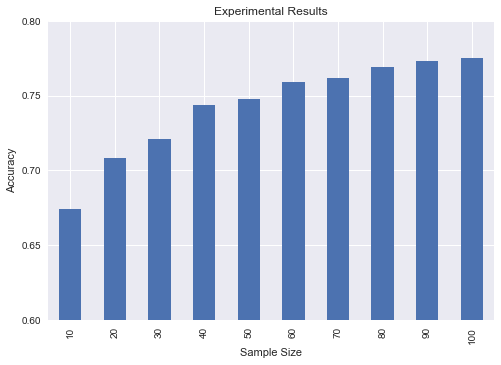

In [11]:
ax = df.plot(kind="bar",x=0,legend=False,title="Experimental Results",yticks=(0.6,0.65,0.7,0.75,0.8))
# set the x-axis label
ax.set_xlabel("Sample Size")
# set the y-axis label
ax.set_ylabel("Accuracy")
# set the y axis range 
ax.set_ylim(0.6,0.8)

Suppose we have results for two competing methods. 

We will have a three rather than two columns in our dataframe:
- the first column holds the sample size
- the second column holds one set of results
- the third column holds a second set of results

Run the cell below.

In [12]:
sample_sizes = list(range(10,110,10))
your_results = [0.674,0.708,0.721,0.744,0.748,0.759,0.762,0.769,0.773,0.775]
my_results = [0.774,0.788,0.801,0.844,0.852,0.855,0.860,0.862,0.863,0.864]

df = pd.DataFrame(list(zip(sample_sizes,your_results,my_results)),columns = ["Sample Size","Your Score","My Score"])
display(df)

,Sample Size,Your Score,My Score
0,10,0.674,0.774
1,20,0.708,0.788
2,30,0.721,0.801
3,40,0.744,0.844
4,50,0.748,0.852
5,60,0.759,0.855
6,70,0.762,0.860
7,80,0.769,0.862
8,90,0.773,0.863
9,100,0.775,0.864


Now we show how to visualise these results.
- This time we want a legend.
- We also need to expand the limits being shown on the y-axis

Run the following cell.

(0.6, 0.9)

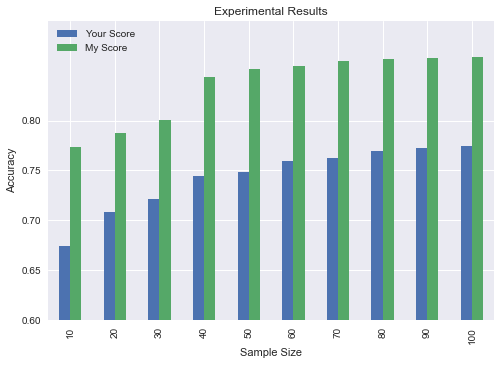

In [81]:
ax = df.plot(kind="bar",x=0,title="Experimental Results",yticks=(0.6,0.65,0.7,0.75,0.8))
# set the x-axis label
ax.set_xlabel("Sample Size")
# set the y-axis label
ax.set_ylabel("Accuracy")
# set the y axis range 
ax.set_ylim(0.6,0.9)

a    1.0
b    2.0
c    3.0
dtype: float64


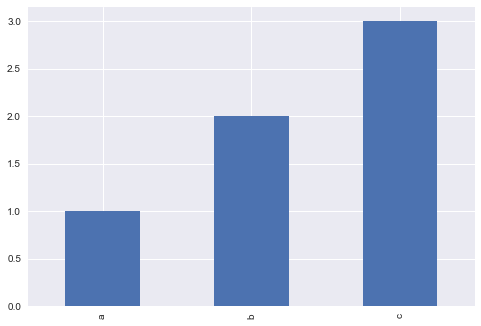

In [82]:
data = {"a": 1., "b":2.,"c":3.}
s = pd.Series(data)
print(s)
s.plot.bar()

## Running a python program
We now look at the difference between three different ways of running a python program. 

The first is the way used in the above examples: simply typing or pasting the code into a notebook (or console) and running it.

Very similar to the first way is to import the code from a file or module into a notebook (or console). If you import a module, python will automatically run it. That means it reads every line in the file and executes. If the module contains function definitions, executing them means creating the functions. If it contains code that calls functions, python will make those calls and run the functions.  

The third way is to run the module from the command line by typing python followed by the module name including the `.py` suffix.

Python behaves the same for the second and third method. However, it is often useful to have a module that runs using the third method but doesn't run using the second i.e. you can import the functions, and perhaps some variables, without running anything. To achieve this, modules often include the line  
- `if __name__ == "__main__"`  
as in the cell below. 

This will run when called from the command line, but not when the file is imported.

The cell below contains the programmes for the tokens exercise. It is also stored in a file named "Exercise.py" You don't need to read the code as nothing has changed (apart from the addition of one line for testing which was added only to the saved file). 

In [22]:
def make_tokens(input_text):
    """
    Take an input text, split it into tokens, find the
    token's shape, make a feature
    vector with the token itself and its shape, return
    a list of all token feature vectors found in the input.
    :param input_text: A character string containing spaces
    :return: A list of token feature vectors (token, shape).
        Sample output: [('a', 'alpha'), ('7', 'digit'), ('A27', 'alnum')]
    """
    
    # Now it's up to the split_tokes function to decide what a token is.
    # List comprehension creates a list by extracting elements from
    # an iterable object, in this case Python automatically converts the
    # split_tokens function into an iterable object because it uses the "yield" statement:
    
    tokens = [token for token in split_tokens(input_text)]
    return map(make_token_feature_vector, tokens)


def make_token_feature_vector(token):
    
    """
    Given a token, extract its shape and return a
    vector with the token itself and its shape
    :param token: A character string
    :return: A tuple (token, shape)
    """
    
    if token.isalpha():
        return (token, "alpha")
    elif token.isdigit():
        return (token, "digit")
    elif token.isalnum():
        return (token, "alnum")
    elif token in ",:;":  
        return (token, "punctuation")
    elif token in ".!?":  
        return (token, "sentence_end")
    elif token == "\n":  
        return (token, "paragraph_end")
    else:
        return (token, "other")



def split_tokens(input_text):
    
    """
    This function decides how to delimit a token. It takes an input
    string, iterates over it character by character; it collects
    constituent characters in the output token; punctuation characters
    are considered delimiters therefore become tokens of their own; the
    space character is removed from tokens. Yield each found token at
    a time.
    :param input_text: A character string containing a mix of text and delimiter characters.
    :yield A character string which is either free from delimiters or
        is a delimiter itself.
    """
    
    # First decide what characters delimit a token:
    DELIMITERS = ",:!?.\n"
    
    token = ""
    for char in input_text:
        
        if char in DELIMITERS:  # test if the input character is a delimiter (substring presence)
            
            # Character strings, lists, etc, have a logical truth value in Python;
            # an empty string is False, if it has characters it is True.
            
            if not token:  # same as token == ""
                yield char
            else:
                
                # Return token to the calling program, but next time this function
                # is called, continue from
                # the next statement rather than from the beginning of the function:
                
                yield token  # After yielding control to the calling program,
                             # this function will execute the next statement:
                token = ""  # Pick up execution from here.
                yield char
        elif char == " ":
            if token:  # same as token != ""
                yield token
                token = ""
        else:
            token += char
            
sample_text = "This is a sample sentence01 showing 7 different token types: alphabetic, numeric, alphanumeric, Title, UPPERCASE, CamelCase and punctuation!\nSentences like that should not exist. They're too artificial.\nA REAL sentence looks different. It has flavour to it. You can smell it; it's like Pythonic code, you know?\nHave you heard of 'code smell'? Google it if you haven't."            

if __name__ == "__main__":
    for token in make_tokens(sample_text):
        print(token)

('This', 'alpha')
('is', 'alpha')
('a', 'alpha')
('sample', 'alpha')
('sentence01', 'alnum')
('showing', 'alpha')
('7', 'digit')
('different', 'alpha')
('token', 'alpha')
('types', 'alpha')
(':', 'punctuation')
('alphabetic', 'alpha')
(',', 'punctuation')
('numeric', 'alpha')
(',', 'punctuation')
('alphanumeric', 'alpha')
(',', 'punctuation')
('Title', 'alpha')
(',', 'punctuation')
('UPPERCASE', 'alpha')
(',', 'punctuation')
('CamelCase', 'alpha')
('and', 'alpha')
('punctuation', 'alpha')
('!', 'sentence_end')
('\n', 'paragraph_end')
('Sentences', 'alpha')
('like', 'alpha')
('that', 'alpha')
('should', 'alpha')
('not', 'alpha')
('exist', 'alpha')
('.', 'sentence_end')
("They're", 'other')
('too', 'alpha')
('artificial', 'alpha')
('.', 'sentence_end')
('\n', 'paragraph_end')
('A', 'alpha')
('REAL', 'alpha')
('sentence', 'alpha')
('looks', 'alpha')
('different', 'alpha')
('.', 'sentence_end')
('It', 'alpha')
('has', 'alpha')
('flavour', 'alpha')
('to', 'alpha')
('it', 'alpha')
('.', 'sen

### Exercise
Try the following.

1. Execute the cell above and look at what happens.

2. In the empty cell below execute:  
`import Exercise`  
Note the capital letter in the filename. 
It should not run the programme. 

To understand what has happened, run each the following commands one at a time:  
`print(noone)`  
`print Exercise.noone`  
`from Exercise import noone`  
`print(noone)` 

The variable `noone` did not exist in the original programme (it was assigned in the test line that was added to the file).
- Notice the difference between the two types of import. Using the second type is more convenient as you don't have to specify the namespace to access functions and variables.
- For this reason people sometimes use the command  
`from module import *`  
However, this is dangerous as you can easily overwrite existing names and python will not warn you. Using the import command in this way is considered bad practice. You can sometimes get away with it when importing your own module, but avoid it with library modules.


In [20]:
print(noone) 

expects the Spanish Inquisition



Note on terminology. The word "parse" means to read and process sequentially. In NLP it also has a specific meaning to analyse text to determine its syntax. To avoid confusion please be aware that in this exercise the first meaning is used.

The programme below constructs a nested list by reading some input text and looking for delimiters.
- First it runs our `make_tokens` function.
- Then it reads one token at a time to construct sentences. Each sentence is a list.
- When the end of a sentence is reached, a new empty list is created and a new sentence read.
- When it reaches the end of a paragraph, all the sentences in that paragraph are kept together in a list, and a new pargraph is created.

There are various ways this could be done. The method below uses the generator method we have seen before where results are delivered using the yield command, instead of the return command. This means the function does not exit, but resumes from the same place the next time it is called.
- Using generators is often a good way to write clear simple code
- Another advantages of the generator method is that it enables data to be processed as it is needed, making it possible to process very large lists that might use up too much memory.

### Exercise
Execute the  cell below and study the code until you understand how it works.

In [19]:
def parse_text(input_text):
    """
    A parsed text is defined as a list of parsed paragraphs.
    Given an input text, parse its paragraphs and return a list
    with the results.
    :param input_text: A character string with paragraphs
    :return: A list of parsed paragraphs
    """
    
    return [paragraph for paragraph in parse_paragraphs(input_text)]


def parse_paragraphs(input_text):
    """
    A parsed paragraph is defined as a list of parsed sentences.
    Given an input text, parse its sentences; if the sentence is
    actually the end of a paragraph, then yield the previous
    sentences packed as a list.
    :param input_text: a character string containing paragraphs
                       and sentences.
    :yield: A list of sentences up to the end of the paragraph.
    """
    
    paragraph = list()
    for sentence in parse_sentences(input_text):
        
        # We expect parse_sentences to return "paragraph_end"
        # when it encounters an end of paragraph mark.
        
        if sentence == "paragraph_end":
            yield paragraph
            paragraph = list()
        else:
            paragraph.append(sentence)
    yield paragraph


def parse_sentences(input_text):
    """
    A parsed sentence is defined as a list of token vectors
    :param input_text: a character string containing paragraphs,
                       sentences and token vectors.
    :yield: A list of token vectors up to the end of a sentence.
    """
    
    token_vectors = make_tokens(input_text)  
    sentence = list()
    
    # Since a token vector is a tuple (token, shape) we can unpack it
    # automatically as we iterate over the list of token vectors:
    
    for token, shape in token_vectors:
        if shape == "sentence_end":
            yield sentence
            sentence = list()
        elif shape == "paragraph_end":
            if sentence:
                yield sentence
                sentence = list()
            yield "paragraph_end"
        else:
            sentence.append((token, shape))
    if sentence:
        yield sentence



print("************************** SENTENCES IN THE PARSED TEXT:")
for sentence in parse_sentences(sample_text):
    print(sentence)
print("************************** PARAGRAPHS IN THE PARSED TEXT:")

for paragraph in parse_paragraphs(sample_text):
    print(paragraph)

print("************************** PARSED TEXT:")
print(parse_text(sample_text))

************************** SENTENCES IN THE PARSED TEXT:
[('This', 'alpha'), ('is', 'alpha'), ('a', 'alpha'), ('sample', 'alpha'), ('sentence01', 'alnum'), ('showing', 'alpha'), ('7', 'digit'), ('different', 'alpha'), ('token', 'alpha'), ('types:', 'other'), ('alphabetic,', 'other'), ('numeric,', 'other'), ('alphanumeric,', 'other'), ('Title,', 'other'), ('UPPERCASE,', 'other'), ('CamelCase', 'alpha'), ('and', 'alpha'), ('punctuation!', 'other'), ('Sentences', 'alpha'), ('like', 'alpha'), ('that', 'alpha'), ('should', 'alpha'), ('not', 'alpha'), ('exist.', 'other'), ("They're", 'other'), ('too', 'alpha'), ('artificial.', 'other'), ('A', 'alpha'), ('REAL', 'alpha'), ('sentence', 'alpha'), ('looks', 'alpha'), ('different.', 'other'), ('It', 'alpha'), ('has', 'alpha'), ('flavour', 'alpha'), ('to', 'alpha'), ('it.', 'other'), ('You', 'alpha'), ('can', 'alpha'), ('smell', 'alpha'), ('it;', 'other'), ("it's", 'other'), ('like', 'alpha'), ('Pythonic', 'alpha'), ('code,', 'other'), ('you', 'al

### Exercise
The programme in the cell below selects a character at random from the nested list generated by the previous programme. Run the cell and make sure you can understand what it is doing.

1. Recall that we defined a token vector to be an ordered pair (token, shape). Accessing the token or the shape with the code `token_vector[0]` or `token_vector[1]` is difficult to read. It is better to define the indices as constants. Constants are always given capitalised names and sit in the global scope. Do you agree that this improves readability?

2. Notice how to index into the nested list and the character string. The line indexing the character string could have been written as:  

`character = parsed_text[paragraph_coord][sentence_coord][token_coord][TOKEN][character_coord]`

Do you think this would have made the programme more readable?

In [26]:
import random

TOKEN = 0  
SHAPE = 1

def get_random_character_coordinates_in_text(parsed_text):
    """
    Given a parsed text, as the one produced by parse_text.py,
    return a random character within the text, together with its
    coordinates.
    :param parsed_text: A nested list with token vectors within
        sentence lists within paragraph lists.
    :return: A vector where the elements are: the random character,
        the paragraph, sentence, token and character coordinates.
        Sample output: ('f', 3, 1, 2, 1)
    """

    # Generate a random index within a valid range:
    
    paragraph_coord = random.randrange(len(parsed_text))
    sentence_coord = random.randrange(len(parsed_text[paragraph_coord]))
    token_coord = random.randrange(len(parsed_text[paragraph_coord][sentence_coord]))
    token = parsed_text[paragraph_coord][sentence_coord][token_coord][TOKEN]
    character_coord = random.randrange(len(token))
        
    
    # With the obtained random coordinates, access the input parsed text:
    
    character = token[character_coord]
    
    return character, paragraph_coord, sentence_coord, token_coord, character_coord


parsed_text = parse_text(sample_text)
for _ in range(10):
    print(get_random_character_coordinates_in_text(parsed_text))

(',', 0, 0, 20, 0)
('i', 0, 0, 1, 0)
('i', 2, 1, 4, 0)
('s', 2, 2, 4, 3)
('o', 2, 0, 3, 2)
('o', 2, 0, 3, 1)
('e', 2, 0, 2, 4)
('s', 2, 1, 1, 2)
('a', 0, 0, 15, 4)
('t', 1, 0, 5, 4)
